In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# import functions from the modsim.py module
from modsim import *

# Background

White dwarf 'stars' are the remnants of a standard star (0.5 to 8 times the size of our own sun). These constitute the majority of the stars in the universe. For most of its life, a star like this fuses hydrogen into helium emitting light as a result. As the star uses up its hydrogen the energy from the fusion in the star becomes weaker. This energy is what resists the star collapsing due to its own gravity. As the energy dwindles, the star shrinks which causes the temperatures in the core of the star to increase. Gradually it will become hot enough in the core of the sun to fuse helium. Helium starts to fuse and increases the fusion pressure of the star causing the star to expand greatly. The star then enters its red giant phase of its life. Helium is fused into carbon and oxygen, but average stars can never get hot enough to fuse carbon. As the helium is used up the star contracts again. However as it contracts, left over helium and hydrogen re-ignite with the increase in heat. This flings the layers outward expanding the star and cooling the center temperature. Fusion stops and the star collapses again. This is the star's final stage in life where the size of the star oscillates with the outer layers bouncing off the center core. The oscillations get larger and larger as the layers of the star bounce off of each other. This process continues until the star flings its outer layers so far out that they do not gravitationally condense again. This leaves the superhot superdense core of carbon (and a bit of oxygen) which could not be fused. This core is called a white dwarf star (it is called this because it glows a bright white because of residual heat but it is not fusing to create more energy hence it is a 'dwarf star.') The white dwarf radiates its heat away gradually. While it is hot the white dwarf contains enough energy to keep its atoms as an ionized superdense plasma; however, as the energy radiates away the structure crystalizes. The properties of this crystal structure are unknown, but the composition has been likened to diamond (this is not entirely accurate as it is much denser and it contains a significant proportion of oxygen however it is an apt comparison as it demonstrates the possible usefulness of the resultant material).

# Question


How long will it take for a white dwarf star to cool to a harvestable temperature?

# Model

## Useful Functions
This section contains some useful functions for mathmatical operations

In [2]:
def surface_area(mass, density, constants):
    """this function calculates the surface area for a sphere of a given material and uniform composition
    mass is the mass of the sphere
    density is the duniform density of the material (kg/m^3)
    constants is a system object containing fundamental constants"""
    
    #calculates the volume of the material
    volume = mass/density
    
    #converts the volume to a sphere and finds the radius
    radius = (volume/(4/3)/constants.pi)**(1/3)
    
    #returns the surface area of the sphere
    return 4*constants.pi*(radius**2)

## State and System

The system and the state are described below. The state holds the curent value of the state of the white dwarf star in the simulation.The system object holds system parameters and fundamental physics constants. the surface area of the star was calculated using the above surface area function and the result was placed into the system to avoid overwriing system values.

In [3]:
"""this code creates a the state of the system
star_temp is the themperature of the star"""
#creates the state of the function
state = State(star_temp = 25000)

"""creates a system with innital values and constants
init is the innital state function
emmisivity is an innate property of the materials involved. White dwarfs emmit radiation in a near perfict manner which correlates to them having an emmisivity value of very close to 1
density is the density of the white dwarf in kg/m^3 and is found by multiplying the density of the sun (1410) times 92,000
c is the speed of light
sigma is the Stefan–Boltzmann constant which describes radiative cooling
k is the Boltzmann constant (different from sigma) which describes the conversion of temperature to internal energy
avagadro is avagadro's constant which is representative of the number of particles in a mol
solarmass is the mass of our sun
carbon_mass_per_mol gives the mass of one mol of carbon in kg/mol
pi is the circle constant of mathmatics
star_mass is the mass of the white dwarf which is 1.018* the mass of our sun
surf_area is the surface area of the star"""
sys = System(init = state,
            emissivity  = 1,
            density = 92000*1410,
            c = 3*10**(8),
            sigma = 5.6703*10**(-8),
            k = 1.380649*10**(-23), 
            avagadro = 6.022140857*10**(23),
            solar_mass = 1.98847*10**40,
            solar_density = 1410,
            carbon_mass_per_mol = 12.011 *10**(-3),
            pi = 3.1415926535,
            year = 31557600,
            t_0 = 0,
            t_end = 31557600*10**15,
            env_temp = 2.7,
            star_mass = 1.018*1.98847*10**40,
            surf_area = 1.401707440331564e+22)

## update function

Because of the complex nature of the white dwarf stars we abstracted the model to a simple model of a sphere of uniform solid density cooling via radiative cooling. To show robustness and prove that this is still a useful model of a white dwarf, two different models were created which used this central assumption.


### General Raditive Cooling equation

For our first model, we started with a generalized differential equation for radiative cooling.

$ \frac{dE_{star}}{dtime}=\epsilon*\sigma*A_{surface}*(T_{star}^4 - T_{environmant}^4)$

We combined this equation with an expression for internal energy in terms of temperature based on an Einstein solid.

This method approximates the vibration of each particle as a quantum harmonic oscillator (a particle which is bounded to a set space and oscillates around that space in accordance with the laws of quantum mechanics). The internal energy is then equated as the sum of these vibrations and mathematically simplified to the equation below.

$E_{internal} = N_{particles}*k*T$

A brief note about Einstein solids, they are a very good approximation for the internal energy of a solid in terms of the temperature of the solid because particles in a solid are restricted in such a way that they do behave as near idealized quantum harmonic oscillators. This method was also chosen over the standard specific heat method of converting internal energy to temperature, because specific heat assumes a constant specific heat independent of temperature which is accurate until high temperatures (like those in recently formed white dwarfs). Also the specific heat of white dwarf material has not yet been measured.

The number of particles was found by using standard molar conversions. For the sake of this calculation we assumed that a white dwarf is constituted entirely of carbon (no specific data on the percent compositions of white dwarfs could be found however there is a consensus that white dwarfs are mostly carbon with a proportion of oxygen which could cause this modeling approximation to be inaccurate)

$N_{particles} = \frac{mass}{carbon_{\frac{mass}{mol}}}*N_{a}$

Thus the final differential equation is the following where $N_{a}$ is Avogadro’s constant and $k$ is the Boltzmann constant

$ \frac{dT_{star}}{dtime}=\frac{\epsilon*\sigma*A_{surface}*(T_{star}^4 - T_{environmant}^4)}{\frac{mass}{carbon_{\frac{mass}{mol}}}*N_{a}*k}$

This differential equation was then used to create a slope function

In [4]:
def rad_gen_slope_func(state,time, sys):
    star_temp = state
    #converts the differential equation for the temperature into code
    dstar_tempdt = -(sys.emissivity*sys.sigma*sys.surf_area*(star_temp**4 - sys.env_temp**4))/(((sys.star_mass/sys.carbon_mass_per_mol)*sys.avagadro)*sys.k)
    #updates the temperature
    return dstar_tempdt

# Results

The results for the first model are shown below. The simulation was run by an ODE solver to optimize the time steps that were taken.

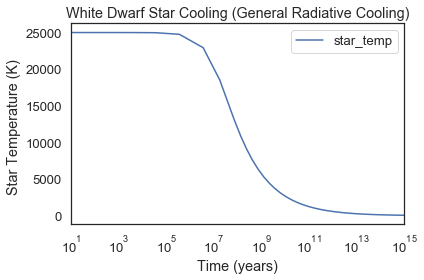

In [5]:
#runs the simulation with an ODE solver
rad_gen_results,e_solid_details = run_ode_solver(sys,rad_gen_slope_func)

#Converts the time indexes from years into seconds
rad_gen_results.index /= sys.year

#plots the results
rad_gen_results.plot()

#decorates the plot and turns it tnto a semilog plot
decorate (xlim = [10,10**15], xscale = "log", xlabel = "Time (years)", ylabel = "Star Temperature (K) ", title = "White Dwarf Star Cooling (General Radiative Cooling)")

# Interperitation

Due to the exotic nature of white dwarf mater, the true time it takes for a white dwarf to cool completely is unknown. The accepted value is $10^{15}$ years before it cools to 5K. This number changes depending on the specifics of what happens. (Some argue that it will take longer to cool because the crystallization will release heat back into the star. Others argue that trace metals and oxygen levels can make significant impacts on the cooling time of the star.

Before we can estimate how long it would take we must see whether our models are reasonable. For that we will compare them to each other and to the $10^{15}$ benchmark.

In [14]:
#this data was actually retrieved from the data constructed. I thas been parsed for readability.
print("General Radative Cooling:")
print("Time (years): 1.000000e+15")
print("Temperature (K): 57.168462 \n")
print("Radiative cooling of a hot sphere:")
print("Time (years): ")
print("Temperature (K): \n")
print("Accepted value:")
print("Time (years): ~1e+15")
print("Temperature (K): 5")

General Radative Cooling:
Time (years): 1.000000e+15
Temperature (K): 57.168462 

Radiative cooling of a hot sphere:
Time (years): 
Temperature (K): 

Accepted value:
Time (years): ~1e+15
Temperature (K): 5


A brief note is that the relevant data for this section has been displayed manually, however complete tables of the results from the model can be seen in the supplemental materials section of this document.

It appears that the General radiative cooling method generates reasonable results. The values are about fifty degrees off such that a white dwarf would actually take longer to cool in this model. This makes sense because real white dwarf stars also cool via some additional methods such as neutrino cooling (The star releases neutrino radiation which carries energy away from the star and speeds cooling. This is not accounted for in general radiative cooling methods because neutrino radiation is not significant/applicable for many applications of radiative cooling).

The motivating question can now be answered by using the data to find when the white dwarf star cools to 'harvestable temperatures.' What is a harvestable temperature? A harvestable temperature is the temperature under which robots can survive to collect samples and harvest the surface. The Russian Venera robot series were the only robots to survive a significant time (110 minutes) on the surface of Venus (735K) before they melted in the extreme environment of Venus. This provides a convenient upper bound on our harvestable temperature. Humans have built robots which can survive the temperatures of space so a lower bound is not relevant as we can continue harvesting the white dwarf after it has sufficiently cooled.

The results?

In [15]:
print("General Raditaive Cooling:")
print("Time (years): 4.830450e+11    Temperature (K) 728.652046")

General Raditaive Cooling:
Time (years): 4.830450e+11    Temperature (K) 728.652046


# Abstract

We created this model to investigate how long it would take for a white dwarf star to cool to harvestable temperatures.
Our General radiative cooling model estimates that it will take about $4.83*10^{11}$ years before a white dwarf star will cool to a temperature comperable to the surface of Venus. The graph of the 
Our model based on the radiative cooling of a hot sphere estimeates that it will take $answer*10^{exponent}$ years to cool to a similar heat. 

# Suplemental Materials
Some data tables have been included here for completeness because they are referenced in the interpretation of the model. However the inclusion of these figures at that point would have been in excess so the relevant data has been highlighted with the complete results being available here.

In [16]:
print("General Radiative Cooling Results:")
print("Temperature", end="")
print(rad_gen_results)

General Radiative Cooling Results:
Temperature                 star_temp
0.000000e+00  25000.000000
3.168809e-12  25000.000000
3.485690e-11  25000.000000
3.517378e-10  25000.000000
3.520547e-09  25000.000000
3.520863e-08  25000.000000
3.520895e-07  25000.000000
3.520898e-06  25000.000000
3.520899e-05  25000.000000
3.520899e-04  25000.000000
3.520899e-03  24999.999998
3.520899e-02  24999.999975
3.520899e-01  24999.999754
3.520899e+00  24999.997538
3.520899e+01  24999.975382
3.520899e+02  24999.753821
3.520899e+03  24997.538649
3.520899e+04  24975.430015
3.520899e+05  24758.556191
3.520899e+06  22933.480666
1.748315e+07  18541.697398
3.656754e+07  15684.819989
7.252224e+07  13036.043982
1.323120e+08  10903.581821
2.362672e+08   9098.570173
4.140547e+08   7598.888400
7.199516e+08   6344.392084
1.245106e+09   5297.612573
2.147407e+09   4423.356495
3.697246e+09   3693.434926
6.359622e+09   3083.943977
1.093297e+10   2575.036670
1.878906e+10   2150.106746
3.228414e+10   1795.298828
5.546586e

In [17]:
print("Radiative Hot Sphere Cooling Results:")
print("Temperature", end="")
#print(hot_sphere_results)

Radiative Hot Sphere Cooling Results:
Temperature

# resources

Temperature of space
https://en.wikipedia.org/wiki/Outer_space

Black body emmisivity
http://whitedwarf.org/theses/gaensicke.pdf

Innital conditions based on Sirius B
https://en.wikipedia.org/wiki/Sirius

Time for white dwarfs to cool to 5k
https://en.wikipedia.org/wiki/Black_dwarf

Radiative cooling equation
http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/cootime.html

Einstein solid equations
http://hyperphysics.phy-astr.gsu.edu/hbase/Therm/einsol.html#c1

White dwarf crystialization:
https://imagine.gsfc.nasa.gov/science/objects/dwarfs2.html

Venera Landers
http://coolcosmos.ipac.caltech.edu/ask/44-Has-a-spacecraft-ever-landed-on-Venus-

Venus temperature
https://www.space.com/18526-venus-temperature.html